In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime, date, time
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings('ignore')

# 1. LOADING THE PLOTS INFORMATION

## 1.1.1 AERODYNAMIC PROPERTIES

In [2]:
#Defining the location of the data folder 
DATA_FOLDER = 'Desktop/PLOTS_DATA_WIND_TURBINES/Aerodynamics_properties_blades/Data/'



#DU21-A17

#Definition of the data path
DATASET1 = DATA_FOLDER + "Drag DU21-A17_pi.csv"
DATASET2 = DATA_FOLDER + "Lift DU21-A17_pi.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_drag_DU21_A17 = pd.read_csv(DATASET1,sep =';',decimal=",")
df_lift_DU21_A17 = pd.read_csv(DATASET2,sep =';',decimal=",")


#Defining the columns names of the uploaded dataframe
df_drag_DU21_A17.columns=["Angle_of_attack", "Cd"]
df_lift_DU21_A17.columns=["Angle_of_attack", "Cl"]



#DU25-A17

#Definition of the data path
DATASET1 = DATA_FOLDER + "Drag DU25-A17_pi.csv"
DATASET2 = DATA_FOLDER + "Lift DU25-A17_pi.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_drag_DU25_A17 = pd.read_csv(DATASET1,sep =';',decimal=",")
df_lift_DU25_A17 = pd.read_csv(DATASET2,sep =';',decimal=",")


#Defining the columns names of the uploaded dataframe
df_drag_DU25_A17.columns=["Angle_of_attack", "Cd"]
df_lift_DU25_A17.columns=["Angle_of_attack", "Cl"]



#DU30-A17

#Definition of the data path
DATASET1 = DATA_FOLDER + "Drag DU30-A17_pi.csv"
DATASET2 = DATA_FOLDER + "Lift DU30-A17_pi.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_drag_DU30_A17 = pd.read_csv(DATASET1,sep =';',decimal=",")
df_lift_DU30_A17 = pd.read_csv(DATASET2,sep =';',decimal=",")


#Defining the columns names of the uploaded dataframe
df_drag_DU30_A17.columns=["Angle_of_attack", "Cd"]
df_lift_DU30_A17.columns=["Angle_of_attack", "Cl"]



#DU35-A17

#Definition of the data path
DATASET1 = DATA_FOLDER + "Drag DU35-A17_pi.csv"
DATASET2 = DATA_FOLDER + "Lift DU35-A17_pi.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_drag_DU35_A17 = pd.read_csv(DATASET1,sep =';',decimal=",")
df_lift_DU35_A17 = pd.read_csv(DATASET2,sep =';',decimal=",")


#Defining the columns names of the uploaded dataframe
df_drag_DU35_A17.columns=["Angle_of_attack", "Cd"]
df_lift_DU35_A17.columns=["Angle_of_attack", "Cl"]



#DU40-A17

#Definition of the data path
DATASET1 = DATA_FOLDER + "Drag DU40-A17_pi.csv"
DATASET2 = DATA_FOLDER + "Lift DU40-A17_pi.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_drag_DU40_A17 = pd.read_csv(DATASET1,sep =';',decimal=",")
df_lift_DU40_A17 = pd.read_csv(DATASET2,sep =';',decimal=",")


#Defining the columns names of the uploaded dataframe
df_drag_DU40_A17.columns=["Angle_of_attack", "Cd"]
df_lift_DU40_A17.columns=["Angle_of_attack", "Cl"]



#NACA64-A17

#Definition of the data path
DATASET1 = DATA_FOLDER + "Drag NACA64-A17_pi.csv"
DATASET2 = DATA_FOLDER + "Lift NACA64-A17_pi.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_drag_NACA64_A17 = pd.read_csv(DATASET1,sep =';',decimal=",")
df_lift_NACA64_A17 = pd.read_csv(DATASET2,sep =';',decimal=",")


#Defining the columns names of the uploaded dataframe
df_drag_NACA64_A17.columns=["Angle_of_attack", "Cd"]
df_lift_NACA64_A17.columns=["Angle_of_attack", "Cl"]

## 1.1.2 AERODYNAMIC FORCES

In [3]:
fx = np.load('fx.npy')
ft = np.load('ft.npy')

# t_total=800s
#500 time steps
#3 different blade turbines
#64 points in the aerodynamic calculation spanwise direction for 62.5 m
#1 turbine

In [4]:
fx.shape

(500, 3, 64, 1)

In [5]:
ft.shape

(500, 3, 64, 1)

Now the objective is extract the useful data only from one blade to reduce the multidimensional array. It will be more intuitively for the following steps have a less dimensions in the aerodynamic force applied in the blade.

In [6]:
fx_2D = fx[:,1,:,0]
ft_2D = ft[:,1,:,0]

It is necessary translate the data from the 64 points in the span-wise direction into his correspondance radius position to be able to interpolate. The best way is create a data frame with value of aerodynamic force and the blade position. The main reason is because if the number of discretization points change in the structural program, be capable to interpolate and get a correct value.

In [7]:
#Creating set of data about the radius/blade position from aerodynamic force simulation.
N_aero = fx.shape[2]
radius_position_aero = np.zeros(N_aero)
R_aero = 63
delta_r_aero = R_aero/(N_aero-1)
r_aero = 0
for i in range(1,N_aero):
    r_aero = r_aero + delta_r_aero
    radius_position_aero[i] = r_aero 

In [8]:
radius_position_aero

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.])

In [9]:
#Creating set of data about the time position from aerodynamic force simulation.
T_aero = fx.shape[0]
time_position_aero = np.zeros(T_aero)
total_t_aero = 800 #seconds
delta_t_aero = total_t_aero/(T_aero-1)
t_aero = 0
for i in range(1,T_aero):
    t_aero = t_aero + delta_t_aero
    time_position_aero[i] = t_aero 

In [10]:
time_position_aero

array([  0.        ,   1.60320641,   3.20641283,   4.80961924,
         6.41282565,   8.01603206,   9.61923848,  11.22244489,
        12.8256513 ,  14.42885772,  16.03206413,  17.63527054,
        19.23847695,  20.84168337,  22.44488978,  24.04809619,
        25.65130261,  27.25450902,  28.85771543,  30.46092184,
        32.06412826,  33.66733467,  35.27054108,  36.87374749,
        38.47695391,  40.08016032,  41.68336673,  43.28657315,
        44.88977956,  46.49298597,  48.09619238,  49.6993988 ,
        51.30260521,  52.90581162,  54.50901804,  56.11222445,
        57.71543086,  59.31863727,  60.92184369,  62.5250501 ,
        64.12825651,  65.73146293,  67.33466934,  68.93787575,
        70.54108216,  72.14428858,  73.74749499,  75.3507014 ,
        76.95390782,  78.55711423,  80.16032064,  81.76352705,
        83.36673347,  84.96993988,  86.57314629,  88.17635271,
        89.77955912,  91.38276553,  92.98597194,  94.58917836,
        96.19238477,  97.79559118,  99.3987976 , 101.00

In [11]:
#Creating dataframes to store the data from the aerodynamic simulation:
columns = ["time", "position"]
index_position = np.linspace(0, 499, num=500)
data_time = np.dstack((time_position_aero,index_position))
data_time = data_time[0,:,:]
df_time_aero = pd.DataFrame(data=data_time, columns=columns)

In [12]:
df_time_aero

,time,position
0,0.000000,0.0
1,1.603206,1.0
2,3.206413,2.0
3,4.809619,3.0
4,6.412826,4.0
...,...,...
495,793.587174,495.0
496,795.190381,496.0
497,796.793587,497.0
498,798.396794,498.0


In [13]:
#Creation of the interpolation function for a determinated dataframe:

def interpolation(r,df):
    xp = df.iloc[:,0]
    fp = df.iloc[:,1]
    interpolation = np.interp(r,xp,fp)
    return interpolation

In [14]:
#Create the function to find index postion of aerodynamic force stored:
def find_aero_index(t,df_time_aero):
    time_index = interpolation(t,df_time_aero)
    trunc_time_index = np.trunc(time_index)
    trunc_time_index = int(trunc_time_index)
    return time_index,trunc_time_index

In [15]:
#Creation of the interpolation function for a determinated time_step aerodynamic simulation:
def interpolation_time(time_index,trunc_time_index,force_2D):
    fst = force_2D[trunc_time_index,:]
    snd = force_2D[trunc_time_index+1,:]
    linfit = interp1d([trunc_time_index,trunc_time_index+1], np.vstack([fst, snd]), axis=0)
    return linfit(time_index)

In [16]:
F = interpolation_time(find_aero_index(3,df_time_aero)[0],find_aero_index(3,df_time_aero)[1],fx_2D)
F

array([   0.        ,    0.        ,    0.        ,    0.        ,
        272.01451584,  305.07103905,  343.4468021 ,  404.83381603,
        498.81343933,  631.71282631,  796.64265144,  992.02704224,
       1058.6556456 , 1198.3023735 , 1324.61544601, 1460.29339233,
       1651.98104721, 1799.55059006, 1953.95997543, 2114.89930817,
       2279.51671967, 2445.80433563, 2588.24444   , 2727.55407349,
       2968.33062927, 3098.48094727, 3232.69367767, 3370.82169586,
       3503.5262674 , 3495.81556885, 3619.64390015, 3747.48035858,
       3881.3532193 , 4018.349646  , 4159.38751862, 4304.54051514,
       4453.4200238 , 4472.67247803, 4602.48107605, 4718.7343927 ,
       4828.28730164, 4935.69472107, 5035.28849304, 5137.65743469,
       5238.39882507, 5680.42082397, 5754.5091748 , 5832.91276794,
       5904.30230103, 5960.4338739 , 5997.55577393, 6013.19540588,
       6002.79270508, 5964.15028748, 5892.71873535, 5776.80592346,
       5616.57901428, 5376.82215576, 5043.56695129, 4640.02625

In [17]:
#Creation a function that creates a dataframe with the time_step aerodynamic forces at each r:
def dataframe_creation(radius_position_aero,aero_force_dataset):
    columns = ["spanwise_length", "Aerodynamic_force"]
    data = np.dstack((radius_position_aero,aero_force_dataset))
    data = data[0,:,:]
    df_force = pd.DataFrame(data=data, columns=columns)
    return df_force

In [18]:
H = dataframe_creation(radius_position_aero,F)
H

,spanwise_length,Aerodynamic_force
0,0.0,0.000000
1,1.0,0.000000
2,2.0,0.000000
3,3.0,0.000000
4,4.0,272.014516
...,...,...
59,59.0,4640.026251
60,60.0,3925.573116
61,61.0,3049.353625
62,62.0,2125.732854


## 1.2 STRUCTURAL PROPERTIES

In [19]:
#Defining the location of the data folder 
DATA_FOLDER = 'Desktop/PLOTS_DATA_WIND_TURBINES/Structural_properties/Data/'



#BLADE DENSITY

#Definition of the data path
DATASET = DATA_FOLDER + "Blade_Density.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_blade_density = pd.read_csv(DATASET,sep =';',decimal=",")

#Defining the columns names of the uploaded dataframe
df_blade_density.columns=["spanwise_length", "blade_density"]



#STRUCTURAL TWIST

#Definition of the data path
DATASET = DATA_FOLDER + "Structural_Twist.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_twist = pd.read_csv(DATASET,sep =';',decimal=",")

#Defining the columns names of the uploaded dataframe
df_twist.columns=["spanwise_length", "twist"]



#FLAPWISE STIFFNESS

#Definition of the data path
DATASET = DATA_FOLDER + "Flapwise_stiffness.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_flapwise_stiffness = pd.read_csv(DATASET,sep =';',decimal=",")

#Defining the columns names of the uploaded dataframe
df_flapwise_stiffness.columns=["spanwise_length", "flapwise_stiffness"]



#EDGEWISE STIFFNESS

#Definition of the data path
DATASET = DATA_FOLDER + "Edgewise_Stiffness.csv"

#Load of the compressed files in a specific way in function of the type of data file 
df_edgewise_stiffness = pd.read_csv(DATASET,sep =';',decimal=",")

#Defining the columns names of the uploaded dataframe
df_edgewise_stiffness.columns=["spanwise_length", "edgewise_stiffness"]

# 2. DEFINING VARIABLES AND ARRAYS TO STORE DATA

In [20]:
#Creating the 6 arrays neededs to store the infromation in each time step.

T = 16000 #Number of points that time is discretized

N = 60 #Number of points that the airfoil is discretized

#Dynamic velocity arrays:
V_0_new = np.zeros(N+2)
V_1_new = np.zeros(N+2)
V_0_old = np.zeros(N+2)
V_1_old = np.zeros(N+2)

#Moments arrays:
M_0_new = np.zeros(N+2)
M_1_new = np.zeros(N+2)
M_0_old = np.zeros(N+2)
M_1_old = np.zeros(N+2)

#Centrifual term arrays:
S_0_new = np.zeros(N+2)
S_1_new = np.zeros(N+2)
S_0_old = np.zeros(N+2)
S_1_old = np.zeros(N+2)

#Dynamic displacement arrays:
q_0_new = np.zeros(N+2)
q_1_new = np.zeros(N+2)
q_0_old = np.zeros(N+2)
q_1_old = np.zeros(N+2)

#Centrifugal force array:
N_force = np.zeros(N+1)

#Radial position in the blade array:
Position = np.zeros(N+2)

#Time position in the simulation array:
Time = np.zeros(T+1)

#Root bending moments array:
Root_M_0 = np.zeros(T+1)
Root_M_1 = np.zeros(T+1)

#Tip velocity of the displacements array:
Tip_V_0 = np.zeros(T+1)
Tip_V_1 = np.zeros(T+1)

#Tip displacements array:
Tip_q_0 = np.zeros(T+1)
Tip_q_1 = np.zeros(T+1)

In [21]:
#Defining the different stiffness properties of the blade in a determinated radius r location:

def EI_00_f(EI_e,EI_f,twist):
  return (EI_e - (EI_e-EI_f)*(math.cos(twist)**2))

def EI_11_f(EI_e,EI_f,twist):
  return (EI_f + (EI_e-EI_f)*(math.cos(twist)**2))

def EI_01_f(EI_e,EI_f,twist):
  return (math.sin(2*twist)*((EI_e-EI_f)/2))

def EI_10_f(EI_e,EI_f,twist):
  return (math.sin(2*twist)*((EI_e-EI_f)/2))

In [22]:
#Creation of a function that calculates the centrifugal term forces in the blade due to w:
def Centrifugal_force(N,w,df_blade_density):
    N_force = 0
    for k in range (N+1):
        r = 1.5
        rho = interpolation(r,df_blade_density)
        R = 63
        delta_r = R/(N-1)
        N_force = N_force + rho*w*r*delta_r
        r = r + delta_r
    return N_force

In [23]:
Centrifugal_force(N,12.1,df_blade_density)

852416.3508353818

In [24]:
#Creation of a function that pass from rpm to rad/s:
def rpm_to_rads(w):
    return (w*(2*math.pi)/60)

# 3. MAIN PROGRAM

In [25]:
#Define time and length steps:

total_time = 1.6
t = 0
w = rpm_to_rads(12.1) #rad/s (but visual value in rpm) 
N_force = Centrifugal_force(N,w,df_blade_density)
phi_0 = math.radians(0) #rad/s initial angle for turbine 1 at t = 0s
phi_1 = math.radians(120) #rad/s initial angle for turbine 2 at t = 0s
phi_2 = math.radians(240) #rad/s initial angle for turbine 3 at t = 0s
g = 9.81 #gravity constant

#Program loop iterations

for j in range(T):
    
    delta_t = total_time/T
    r = 1.5
    g_0 = 0.0
    g_1 = g*math.cos(phi_1+w*t)
    F_0_total = interpolation_time(find_aero_index(t,df_time_aero)[0],find_aero_index(t,df_time_aero)[1],fx_2D)
    F_1_total = interpolation_time(find_aero_index(t,df_time_aero)[0],find_aero_index(t,df_time_aero)[1],ft_2D)
    df_F_0 = dataframe_creation(radius_position_aero,F_0_total) #Creating dataframe aero_force direction 0 at actual time_step
    df_F_1 = dataframe_creation(radius_position_aero,F_1_total) #Creating dataframe aero_force direction 1 at actual time_step
    
    for i in range(1,N+1):
        
        R = 63
        delta_r = R/(N-1)
        
        #First we need to define all the properties for the i position:
        EI_e = (10**10)*interpolation(r,df_edgewise_stiffness)
        EI_f = (10**10)*interpolation(r,df_flapwise_stiffness)
        twist = interpolation(r,df_twist)
        rho = interpolation(r,df_blade_density)
        F_0 = interpolation(r,df_F_0) #Aerodynamic force direction 0
        F_1 = interpolation(r,df_F_1) #Aerodynamic force direction 1
        
        #Secondly calculate new values of data from the old step time:
        V_0_new[i] = V_0_old[i] + delta_t*((-1/rho)*((M_0_old[i+1]-(2*M_0_old[i])+M_0_old[i-1])/delta_r**2)+((1/rho)*((S_0_old[i+1]-S_0_old[i])/delta_r))+(F_0/rho)+ g_0)
        V_1_new[i] = V_1_old[i] + delta_t*((-1/rho)*((M_1_old[i+1]-(2*M_1_old[i])+M_1_old[i-1])/delta_r**2)+((1/rho)*((S_1_old[i+1]-S_1_old[i])/delta_r))+(F_1/rho)+ g_1)
        
        #Boundary conditions at the ROOT position: 
        V_0_new[0] = 0
        V_1_new[0] = 0
        V_0_new[1] = 0
        V_1_new[1] = 0
        
        
        M_0_new[i] = M_0_old[i] + delta_t*((EI_00_f(EI_e,EI_f,twist)*((V_0_new[i+1]-(2*V_0_new[i])+V_0_new[i-1])/delta_r**2)+EI_01_f(EI_e,EI_f,twist)*((V_1_new[i+1]-(2*V_1_new[i])+V_1_new[i-1])/delta_r**2)))
        M_1_new[i] = M_1_old[i] + delta_t*((EI_11_f(EI_e,EI_f,twist)*((V_1_new[i+1]-(2*V_1_new[i])+V_1_new[i-1])/delta_r**2)+EI_10_f(EI_e,EI_f,twist)*((V_0_new[i+1]-(2*V_0_new[i])+V_0_new[i-1])/delta_r**2)))
        S_0_new[i] = S_0_old[i] + delta_t*(N_force*((V_0_new[i]-V_0_new[i-1])/delta_r))
        S_1_new[i] = S_1_old[i] + delta_t*(N_force*((V_1_new[i]-V_1_new[i-1])/delta_r))
    
        #Boundary conditions at the TIPS position:
        M_0_new[N+1] = 0
        M_1_new[N+1] = 0
        M_0_new[N] = 0
        M_1_new[N] = 0
        
        q_0_new[i] = q_0_old[i] + delta_t*((V_0_old[i]))
        q_1_new[i] = q_1_old[i] + delta_t*((V_1_old[i]))
    
        
        #Position control:
        
        Position[i] = r
        r = r + delta_r
    
    #Upload data to new time-step:
    V_0_old = V_0_new 
    V_1_old = V_1_new 
    M_0_old = M_0_new 
    M_1_old = M_1_new 
    q_0_old = q_0_new
    q_1_old = q_1_new
    
    #Store data to plot:   
    Root_M_0[j] = M_0_new[1]
    Root_M_1[j] = M_1_new[1]
    Tip_V_0[j] = V_0_new[N]
    Tip_V_1[j] = V_0_new[N]
    Tip_q_0[j] = q_0_new[N]
    Tip_q_1[j] = q_1_new[N]
    
    #Time control:
    
    Time[j] = t
    t = t + delta_t
   

In [26]:
Root_M_1

array([ 0.00000000e+00, -8.27945899e+02, -1.80713327e+03, ...,
        1.63793693e+06,  1.63756037e+06,  0.00000000e+00])

# 4. RESULTS & PLOTS

In this part, we will make different plots to be able to see in a better way the results obtained with the program developed.

First we will need to create the new dataframes to be able to

## 4.1.1 TIP DISPLACEMENT OVER THE TIME

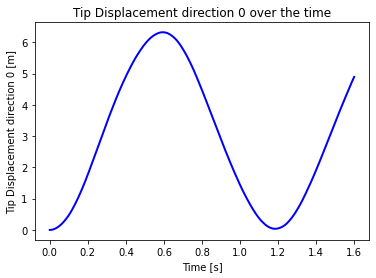

In [27]:
#Creating the plot figure:

x = Time[:-1]
y = Tip_q_0[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Tip Displacement direction 0 [m]')
plt.xlabel('Time [s]')
plt.title('Tip Displacement direction 0 over the time');

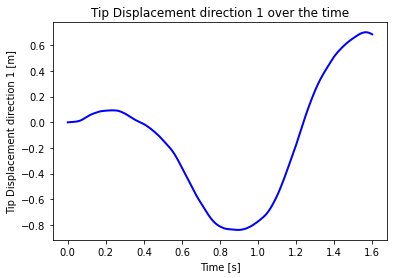

In [28]:
#Creating the plot figure:

x = Time[:-1]
y = Tip_q_1[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Tip Displacement direction 1 [m]')
plt.xlabel('Time [s]')
plt.title('Tip Displacement direction 1 over the time');

## 4.1.2 DISPLACEMENT IN THE BLADE

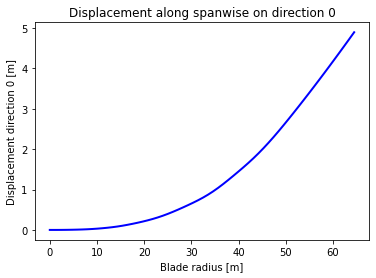

In [29]:
#Creating the plot figure:

x = Position[:-1]
y = q_0_new[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Displacement direction 0 [m]')
plt.xlabel('Blade radius [m]')
plt.title('Displacement along spanwise on direction 0');

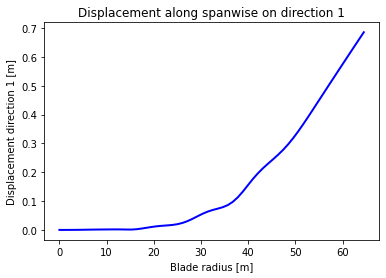

In [30]:
#Creating the plot figure:

x = Position[:-1]
#y = ((q_1_new[:-1]+(A_q/2))*math.exp(-beta*t)-(A_q/2))
y = q_1_new[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Displacement direction 1 [m]')
plt.xlabel('Blade radius [m]')
plt.title('Displacement along spanwise on direction 1');

## 4.2.1 ROOT BENDING MOMENT OVER THE TIME

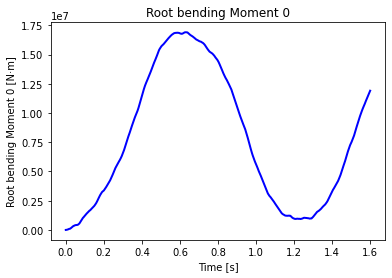

In [31]:
#Creating the plot figure:

x = Time[:-1]
y = Root_M_0[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Root bending Moment 0 [N·m]')
plt.xlabel('Time [s]')
plt.title('Root bending Moment 0');

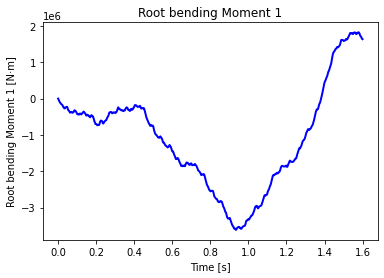

In [32]:
#Creating the plot figure:

x = Time[:-1]
y = Root_M_1[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Root bending Moment 1 [N·m]')
plt.xlabel('Time [s]')
plt.title('Root bending Moment 1');

## 4.2.2 BENDING MOMENT IN THE BLADE

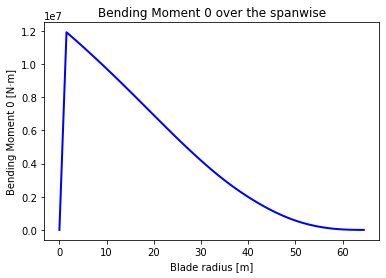

In [33]:
#Creating the plot figure:

x = Position[:-1]
y = M_0_new[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Bending Moment 0 [N·m]')
plt.xlabel('Blade radius [m]')
plt.title('Bending Moment 0 over the spanwise');

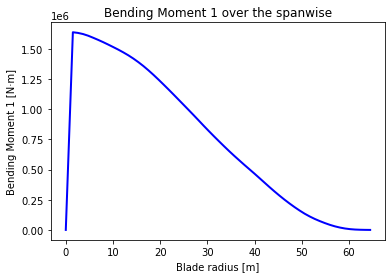

In [34]:
#Creating the plot figure:

x = Position[:-1]
y = M_1_new[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Bending Moment 1 [N·m]')
plt.xlabel('Blade radius [m]')
plt.title('Bending Moment 1 over the spanwise');

## 4.3.1 TIP VELOCITY DISPLACEMENT OVER THE TIME 

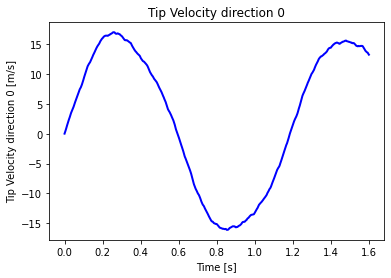

In [35]:
#Creating the plot figure:

x = Time[:-1]
y = Tip_V_0[:-1]

plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Tip Velocity direction 0 [m/s]')
plt.xlabel('Time [s]')
plt.title('Tip Velocity direction 0');

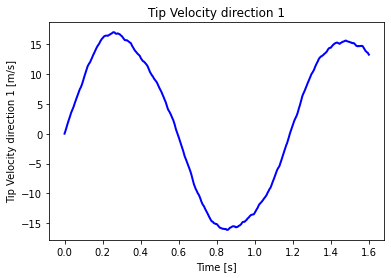

In [36]:
#Creating the plot figure:

x = Time[:-1]
y = Tip_V_1[:-1]

plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Tip Velocity direction 1 [m/s]')
plt.xlabel('Time [s]')
plt.title('Tip Velocity direction 1');

## 4.3.2 VELOCITY OF DISPLACEMENT IN THE BLADE

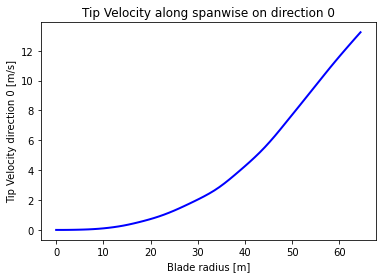

In [37]:
#Creating the plot figure:

x = Position[:-1]
y = V_0_new[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Tip Velocity direction 0 [m/s]')
plt.xlabel('Blade radius [m]')
plt.title('Tip Velocity along spanwise on direction 0');

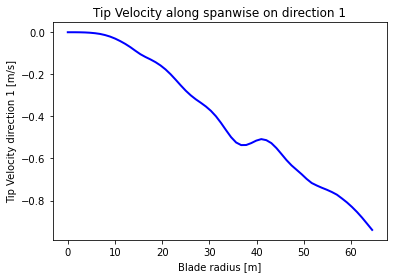

In [38]:
#Creating the plot figure:

x = Position[:-1]
y = V_1_new[:-1]


plt.plot(x, y, color='blue', linewidth=2)
plt.ylabel('Tip Velocity direction 1 [m/s]')
plt.xlabel('Blade radius [m]')
plt.title('Tip Velocity along spanwise on direction 1');

In [39]:
maxim(T,total_time,Root_M_1)

NameError: name 'maxim' is not defined

In [ ]:
minim(T,total_time,Root_M_1)

In [ ]:
amplitud(maxim(T,total_time,Root_M_1),minim(T,total_time,Root_M_1))